# Investigating the relationship between the geographical denominations of Inner/Outer London and social, demographic, economic, health, political, and community safety factors.

Install Packages

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

## Data Description and Manipulation

In [2]:
borough = pd.read_csv('borough_data.csv')

In [3]:
borough.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 46 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Code                                                                                    33 non-null     object 
 1   New code                                                                                33 non-null     object 
 2   Area name                                                                               33 non-null     object 
 3   Inner/ Outer London                                                                     33 non-null     object 
 4   GLA Population Estimate 2017                                                            33 non-null     int64  
 5   Population density (per hectare) 2017                                    

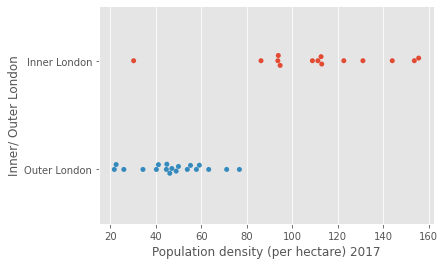

In [4]:
sn.swarmplot(x='Population density (per hectare) 2017', y='Inner/ Outer London', data=borough)

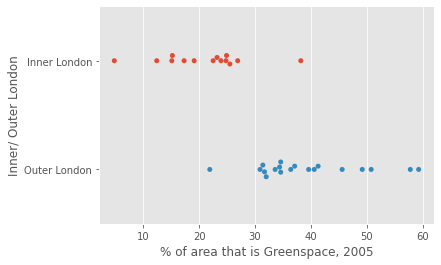

In [5]:
sn.swarmplot(x='% of area that is Greenspace, 2005', y='Inner/ Outer London', data=borough)

Clearly, Inner and Outer London have a difference in Population Density. We can also note, City of London as an outlier in Inner London data. 

Missing Data

By rows

In [6]:
borough.isnull().sum(axis=1)
count=0
for i in borough.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(borough.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')
print('here City of London is excluded')

Total number of rows with missing values is  1
since it is only 3 percent of the entire dataset the rows with missing values are excluded.
here City of London is excluded


In [7]:
borough=borough.drop([0])

By columns

In [8]:
borough.isnull().sum()

Code                                                                                      0
New code                                                                                  0
Area name                                                                                 0
Inner/ Outer London                                                                       0
GLA Population Estimate 2017                                                              0
Population density (per hectare) 2017                                                     0
Average Age, 2017                                                                         0
Proportion of population aged 0-15, 2015                                                  0
Proportion of population of working-age, 2015                                             0
Proportion of population aged 65 and over, 2015                                           0
Net internal migration (2015)                                                   

The first three columns are not required since we focus on Inner and Outer London only

In [9]:
borough=borough.drop(['Code','New code','Area name'], axis=1)

In [10]:
borough.head()

,Inner/ Outer London,GLA Population Estimate 2017,Population density (per hectare) 2017,"Average Age, 2017","Proportion of population aged 0-15, 2015","Proportion of population of working-age, 2015","Proportion of population aged 65 and over, 2015",Net internal migration (2015),Net international migration (2015),Net natural change (2015),...,Worthwhileness score 2011-14 (out of 10),Happiness score 2011-14 (out of 10),Anxiety score 2011-14 (out of 10),Childhood Obesity Prevalance (%) 2015/16,People aged 17+ with diabetes (%),Mortality rate from causes considered preventable 2012/14,Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections
1,Outer London,209000,57.9000,32.9000,27.2000,63.1000,9.7000,-1176,2509,2356,...,7.6000,7.1000,3.1000,28.5000,7.3000,228,0.0000,100.0000,0.0000,36.5000
2,Outer London,389600,44.9000,37.3000,21.1000,64.9000,14.0000,-3379,5407,2757,...,7.8000,7.4000,2.8000,20.7000,6.0000,134,50.8000,47.6000,1.6000,40.5000
3,Outer London,244300,40.3000,39.0000,20.6000,62.9000,16.6000,413,760,1095,...,7.7000,7.2000,3.3000,22.7000,6.9000,164,71.4000,23.8000,0.0000,39.6000
4,Outer London,332100,76.8000,35.6000,20.9000,67.8000,11.3000,-7739,7640,3372,...,7.4000,7.2000,2.9000,24.3000,7.9000,169,9.5000,88.9000,1.6000,36.3000
5,Outer London,327900,21.8000,40.2000,19.9000,62.6000,17.5000,1342,796,1445,...,7.9000,7.4000,3.3000,16.0000,5.2000,148,85.0000,11.7000,0.0000,40.8000


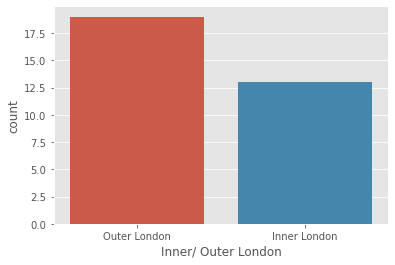

In [11]:
sn.countplot(x='Inner/ Outer London',data=borough)

There are 13 Inner London denominations and 19 Outer London denominations

Converting Inner London to 1 and Outer London to 0 for analysis

In [12]:
mapping = {'Inner London': 1, 'Outer London': 0}
borough=borough.applymap(lambda s: mapping.get(s) if s in mapping else s)

In [13]:
borough=borough.sort_values(by=['Inner/ Outer London'])

Summary Statistics

In [14]:
borough.describe()

,Inner/ Outer London,GLA Population Estimate 2017,Population density (per hectare) 2017,"Average Age, 2017","Proportion of population aged 0-15, 2015","Proportion of population of working-age, 2015","Proportion of population aged 65 and over, 2015",Net internal migration (2015),Net international migration (2015),Net natural change (2015),...,Worthwhileness score 2011-14 (out of 10),Happiness score 2011-14 (out of 10),Anxiety score 2011-14 (out of 10),Childhood Obesity Prevalance (%) 2015/16,People aged 17+ with diabetes (%),Mortality rate from causes considered preventable 2012/14,Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections
count,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,...,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000
mean,0.4062,"275,831.2500",75.8563,36.1625,20.2250,68.1031,11.6656,"-2,422.7500","4,163.6250","2,448.1250",...,7.5813,7.2469,3.2906,22.6625,5.9406,173.3438,32.7125,56.9094,6.6031,38.8406
std,0.4990,"60,294.9334",39.2016,2.2000,2.3250,3.8749,3.0813,"2,232.1868","2,944.2572",956.7446,...,0.1447,0.1244,0.2763,3.7552,1.2321,27.3090,27.0132,32.4338,16.5585,3.5292
min,0.0000,"159,000.0000",21.8000,31.4000,15.9000,62.3000,6.0000,"-7,739.0000",568.0000,785.0000,...,7.3000,7.0000,2.6000,12.6000,3.7000,134.0000,0.0000,0.0000,0.0000,29.8000
25%,0.0000,"239,375.0000",45.8750,35.0000,19.1250,64.8000,9.3000,"-3,365.5000","2,387.0000","1,507.0000",...,7.5000,7.2000,3.1750,20.5750,5.0000,157.2500,8.8750,30.4500,0.0000,36.8750
50%,0.0000,"277,100.0000",61.2500,36.0000,20.6000,67.6500,11.7000,"-2,257.5000","3,524.5000","2,763.0000",...,7.6000,7.2000,3.3000,23.1500,5.9500,167.5000,30.0000,58.5500,0.0000,38.5000
75%,1.0000,"322,725.0000",109.5000,37.4000,21.3250,71.2750,13.4000,"-1,188.0000","5,576.2500","3,182.0000",...,7.7000,7.3000,3.4250,24.9750,6.6750,191.5000,52.6750,84.2250,2.7000,40.7250
max,1.0000,"389,600.0000",155.6000,40.3000,27.2000,75.3000,18.4000,"1,710.0000","11,182.0000","4,616.0000",...,7.9000,7.6000,3.8000,28.5000,8.5000,239.0000,85.0000,100.0000,83.3000,47.2000


Data Visualisation to infer data type and distribution: Histogram

<ipython-input-15-d2f84c9d6283>:8: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


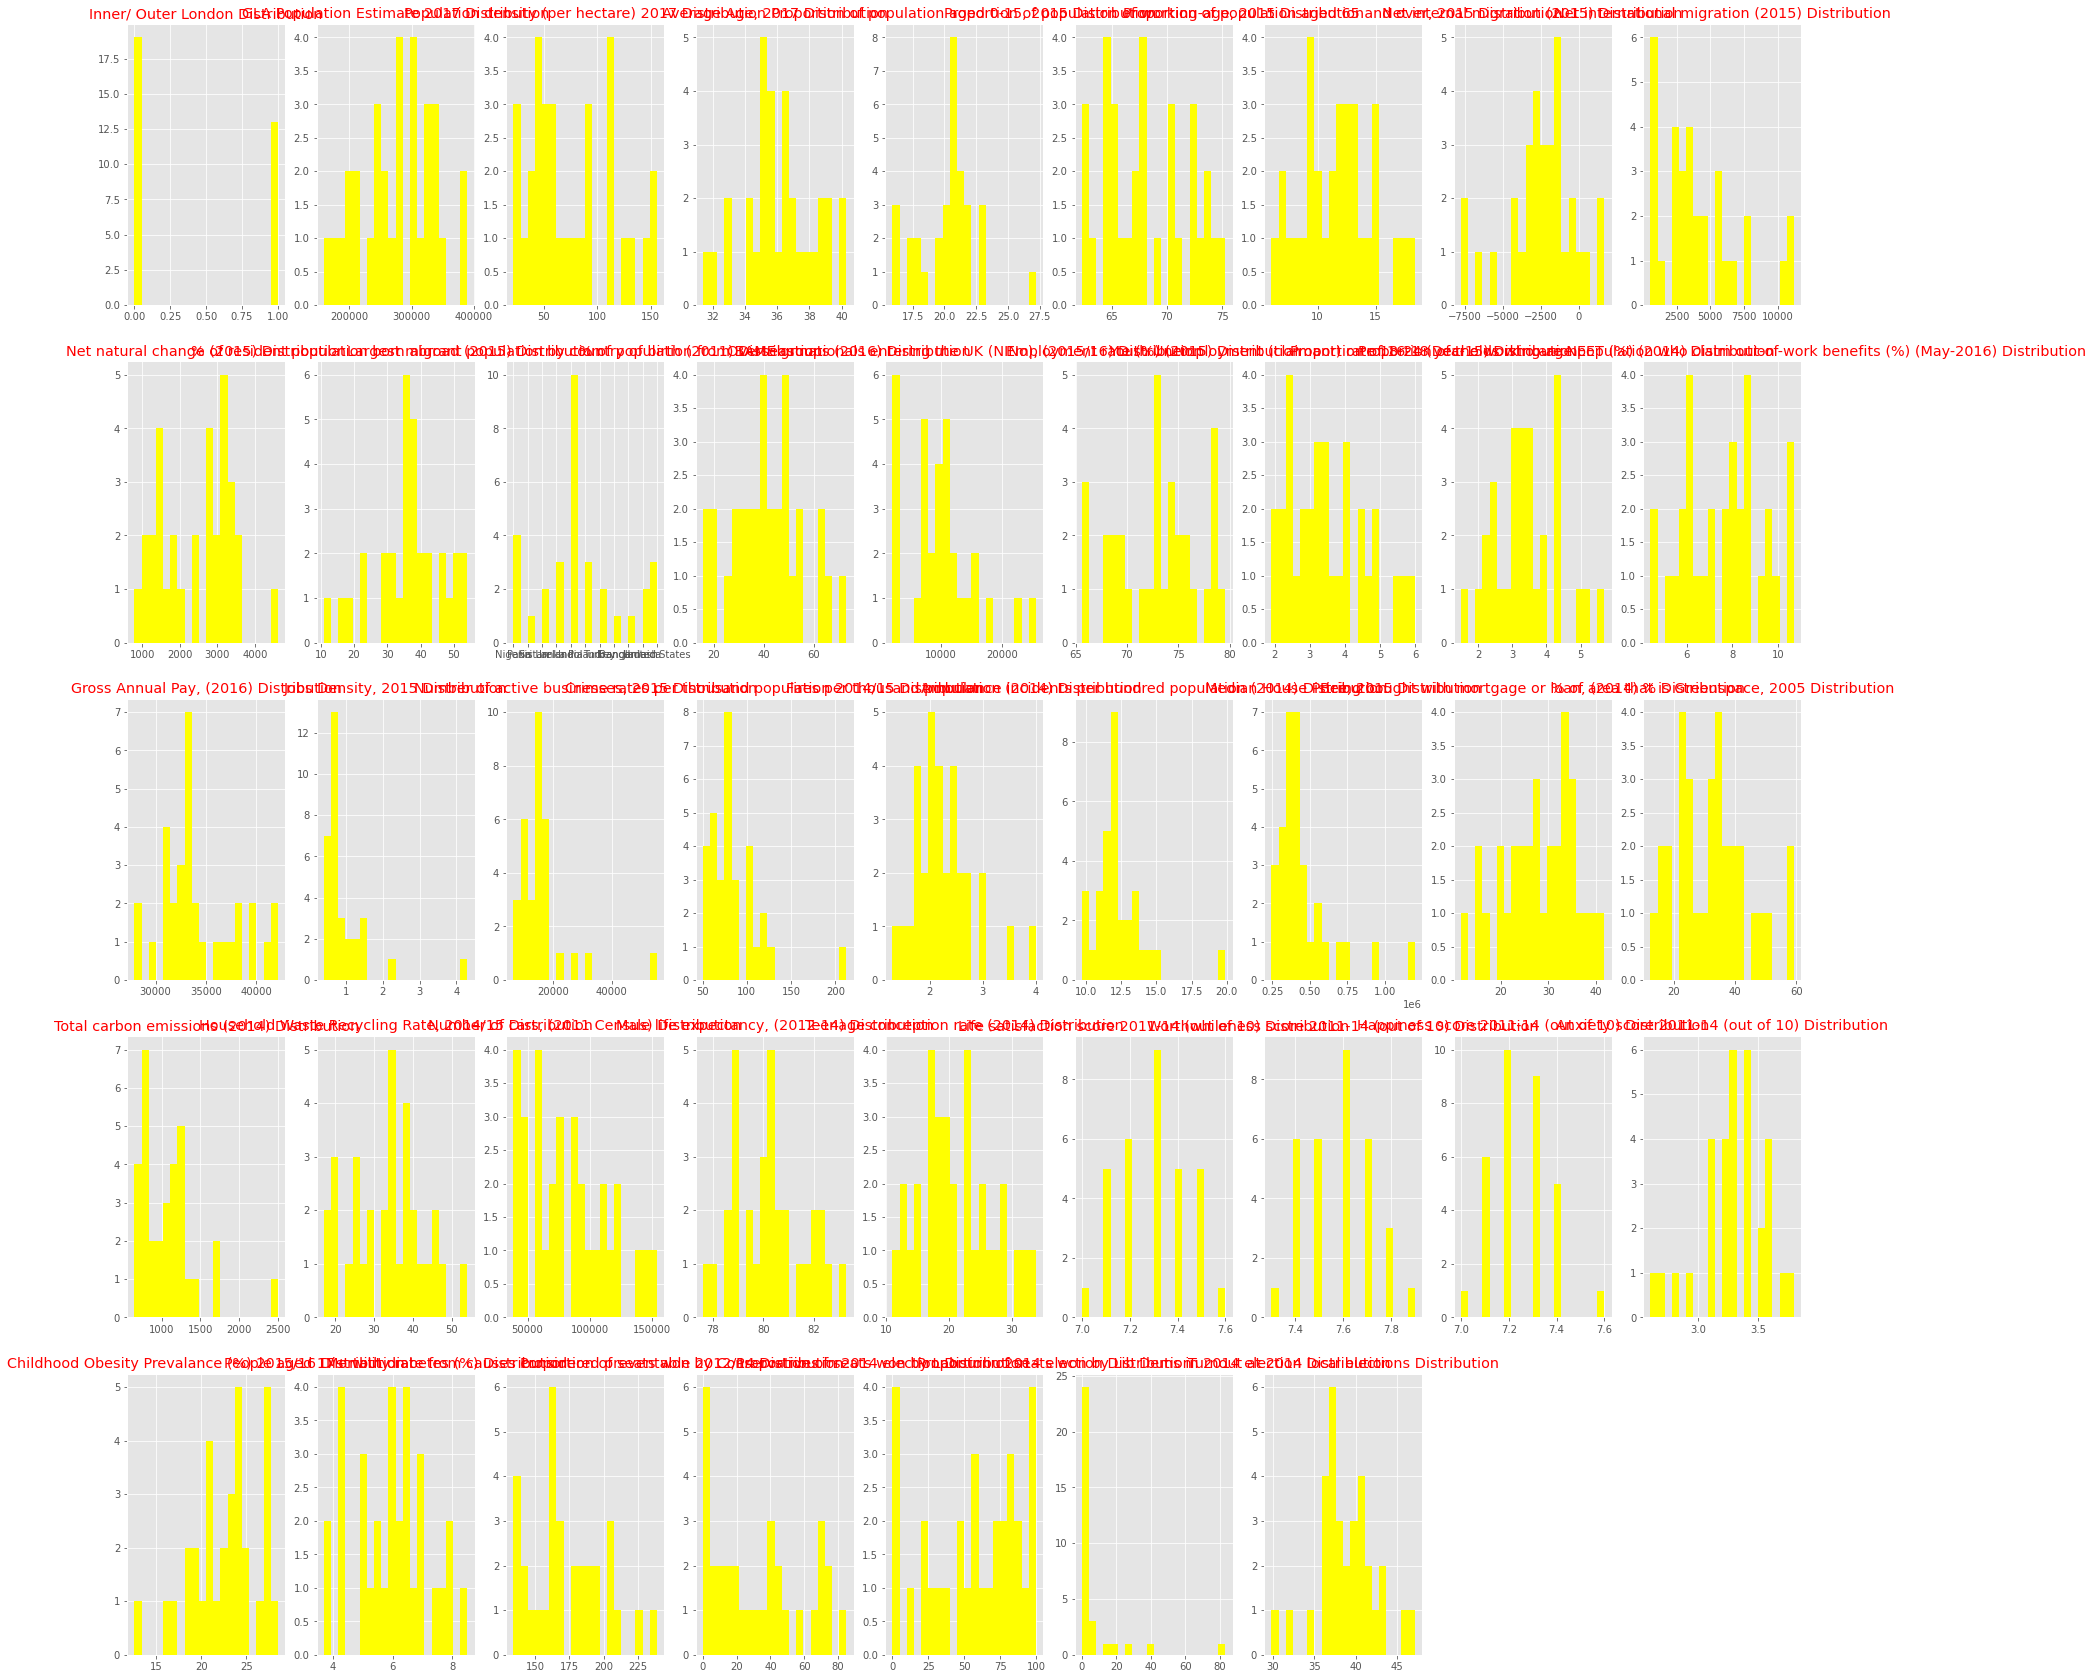

In [15]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(30,30))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='Yellow')
        ax.set_title(feature+" Distribution",color='Red')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(borough,borough.columns,5,9)

Data Visualisation to infer relationship between y and x: Scatter Plot

In [16]:
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

#style.use('seaborn-whitegrid')
#plt.rcParams['figure.figsize'] = (20,10)

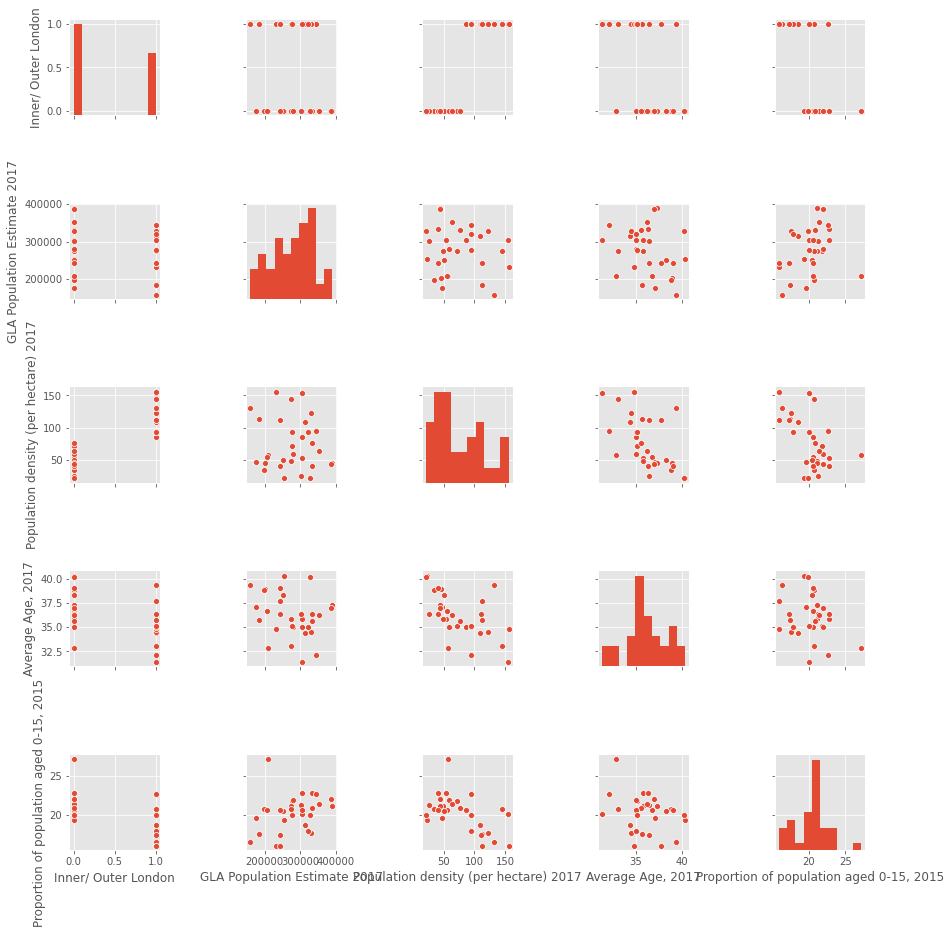

In [17]:
sb.pairplot(borough[borough.columns[0:5]])
#plt.savefig('pairplor.png')

Dependent Variable

In [18]:
y = borough[['Inner/ Outer London']]
borough['Inner/ Outer London'].value_counts()
borough.groupby('Inner/ Outer London').mean()

,GLA Population Estimate 2017,Population density (per hectare) 2017,"Average Age, 2017","Proportion of population aged 0-15, 2015","Proportion of population of working-age, 2015","Proportion of population aged 65 and over, 2015",Net internal migration (2015),Net international migration (2015),Net natural change (2015),% of resident population born abroad (2015),...,Worthwhileness score 2011-14 (out of 10),Happiness score 2011-14 (out of 10),Anxiety score 2011-14 (out of 10),Childhood Obesity Prevalance (%) 2015/16,People aged 17+ with diabetes (%),Mortality rate from causes considered preventable 2012/14,Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections
Inner/ Outer London,,,,,,,,,,,,,,,,,,,,,
0,"278,931.5789",47.6737,36.9842,21.3789,65.3263,13.3000,"-2,192.6842","2,983.7895","2,283.1053",33.6368,...,7.6316,7.2632,3.2000,21.9632,6.3947,162.5789,38.9158,48.4947,8.7211,39.7947
1,"271,300.0000",117.0462,34.9615,18.5385,72.1615,9.2769,"-2,759.0000","5,888.0000","2,689.3077",40.7154,...,7.5077,7.2231,3.4231,23.6846,5.2769,189.0769,23.6462,69.2077,3.5077,37.4462


Independent Variables

In [19]:
borough_variables= borough.drop(['Inner/ Outer London'], axis=1)

In [20]:
borough_variables.head(2)

,GLA Population Estimate 2017,Population density (per hectare) 2017,"Average Age, 2017","Proportion of population aged 0-15, 2015","Proportion of population of working-age, 2015","Proportion of population aged 65 and over, 2015",Net internal migration (2015),Net international migration (2015),Net natural change (2015),% of resident population born abroad (2015),...,Worthwhileness score 2011-14 (out of 10),Happiness score 2011-14 (out of 10),Anxiety score 2011-14 (out of 10),Childhood Obesity Prevalance (%) 2015/16,People aged 17+ with diabetes (%),Mortality rate from causes considered preventable 2012/14,Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections
1,209000,57.9000,32.9000,27.2000,63.1000,9.7000,-1176,2509,2356,37.8000,...,7.6000,7.1000,3.1000,28.5000,7.3000,228,0.0000,100.0000,0.0000,36.5000
30,276200,71.2000,35.1000,21.8000,67.9000,10.3000,-5787,5814,3125,37.2000,...,7.5000,7.1000,3.1000,26.3000,6.4000,185,26.7000,73.3000,0.0000,37.6000


X variable into groups for analysis

In [21]:
#Demography: Population
borough_demography_population=borough_variables[borough_variables.columns[0:2]]
#Demography: Age
borough_demography_age=borough_variables[borough_variables.columns[2:6]]
#Diversity
borough_diversity=borough_variables[borough_variables.columns[6:13]]
#Economy
borough_economy=borough_variables[borough_variables.columns[13:20]]
#Community Safety
borough_safety=borough_variables[borough_variables.columns[20:23]]
#Housing
borough_housing=borough_variables[borough_variables.columns[23:25]]
#Environment
borough_greenspace=borough_variables[borough_variables.columns[25]]
borough_pollution=borough_variables[borough_variables.columns[26:29]]
#Health
borough_health=borough_variables[borough_variables.columns[29:38]]
#Politics
borough_politics=borough_variables[borough_variables.columns[38:41]]

Categorial Variables

In [22]:
borough_diversity = pd.get_dummies(borough_diversity)

In [23]:
borough_diversity.head(10)

,Net internal migration (2015),Net international migration (2015),Net natural change (2015),% of resident population born abroad (2015),% of population from BAME groups (2016),"Overseas nationals entering the UK (NINo), (2015/16)",Largest migrant population by country of birth (2011)_Bangladesh,Largest migrant population by country of birth (2011)_France,Largest migrant population by country of birth (2011)_India,Largest migrant population by country of birth (2011)_Ireland,Largest migrant population by country of birth (2011)_Jamaica,Largest migrant population by country of birth (2011)_Nigeria,Largest migrant population by country of birth (2011)_Pakistan,Largest migrant population by country of birth (2011)_Poland,Largest migrant population by country of birth (2011)_Sri Lanka,Largest migrant population by country of birth (2011)_Turkey,Largest migrant population by country of birth (2011)_United States
1,-1176,2509,2356,37.8000,49.5000,"7,538.0000",0,0,0,0,0,1,0,0,0,0,0
30,-5787,5814,3125,37.2000,49.9000,"15,452.0000",0,0,0,0,0,0,1,0,0,0,0
28,161,568,1269,23.1000,25.0000,"2,070.0000",0,0,0,0,0,0,0,0,1,0,0
26,-1192,913,1391,23.7000,15.7000,"2,580.0000",0,0,0,1,0,0,0,0,0,0,0
25,-2912,3685,2960,40.2000,62.7000,"10,534.0000",0,0,1,0,0,0,0,0,0,0,0
23,-2060,1077,2029,37.4000,36.7000,"6,684.0000",0,0,0,0,0,0,0,1,0,0,0
20,-226,2547,1207,29.8000,30.4000,"3,205.0000",0,0,0,0,0,0,0,0,1,0,0
17,-3994,4425,2871,46.3000,51.6000,"11,336.0000",0,0,1,0,0,0,0,0,0,0,0
15,1710,604,785,10.9000,15.7000,"2,642.0000",0,0,0,1,0,0,0,0,0,0,0
14,-3644,2833,1933,49.6000,61.8000,"10,427.0000",0,0,1,0,0,0,0,0,0,0,0


Checking for correlation and collinearity

Text(0.5, 1.05, 'Correlation Matrix')

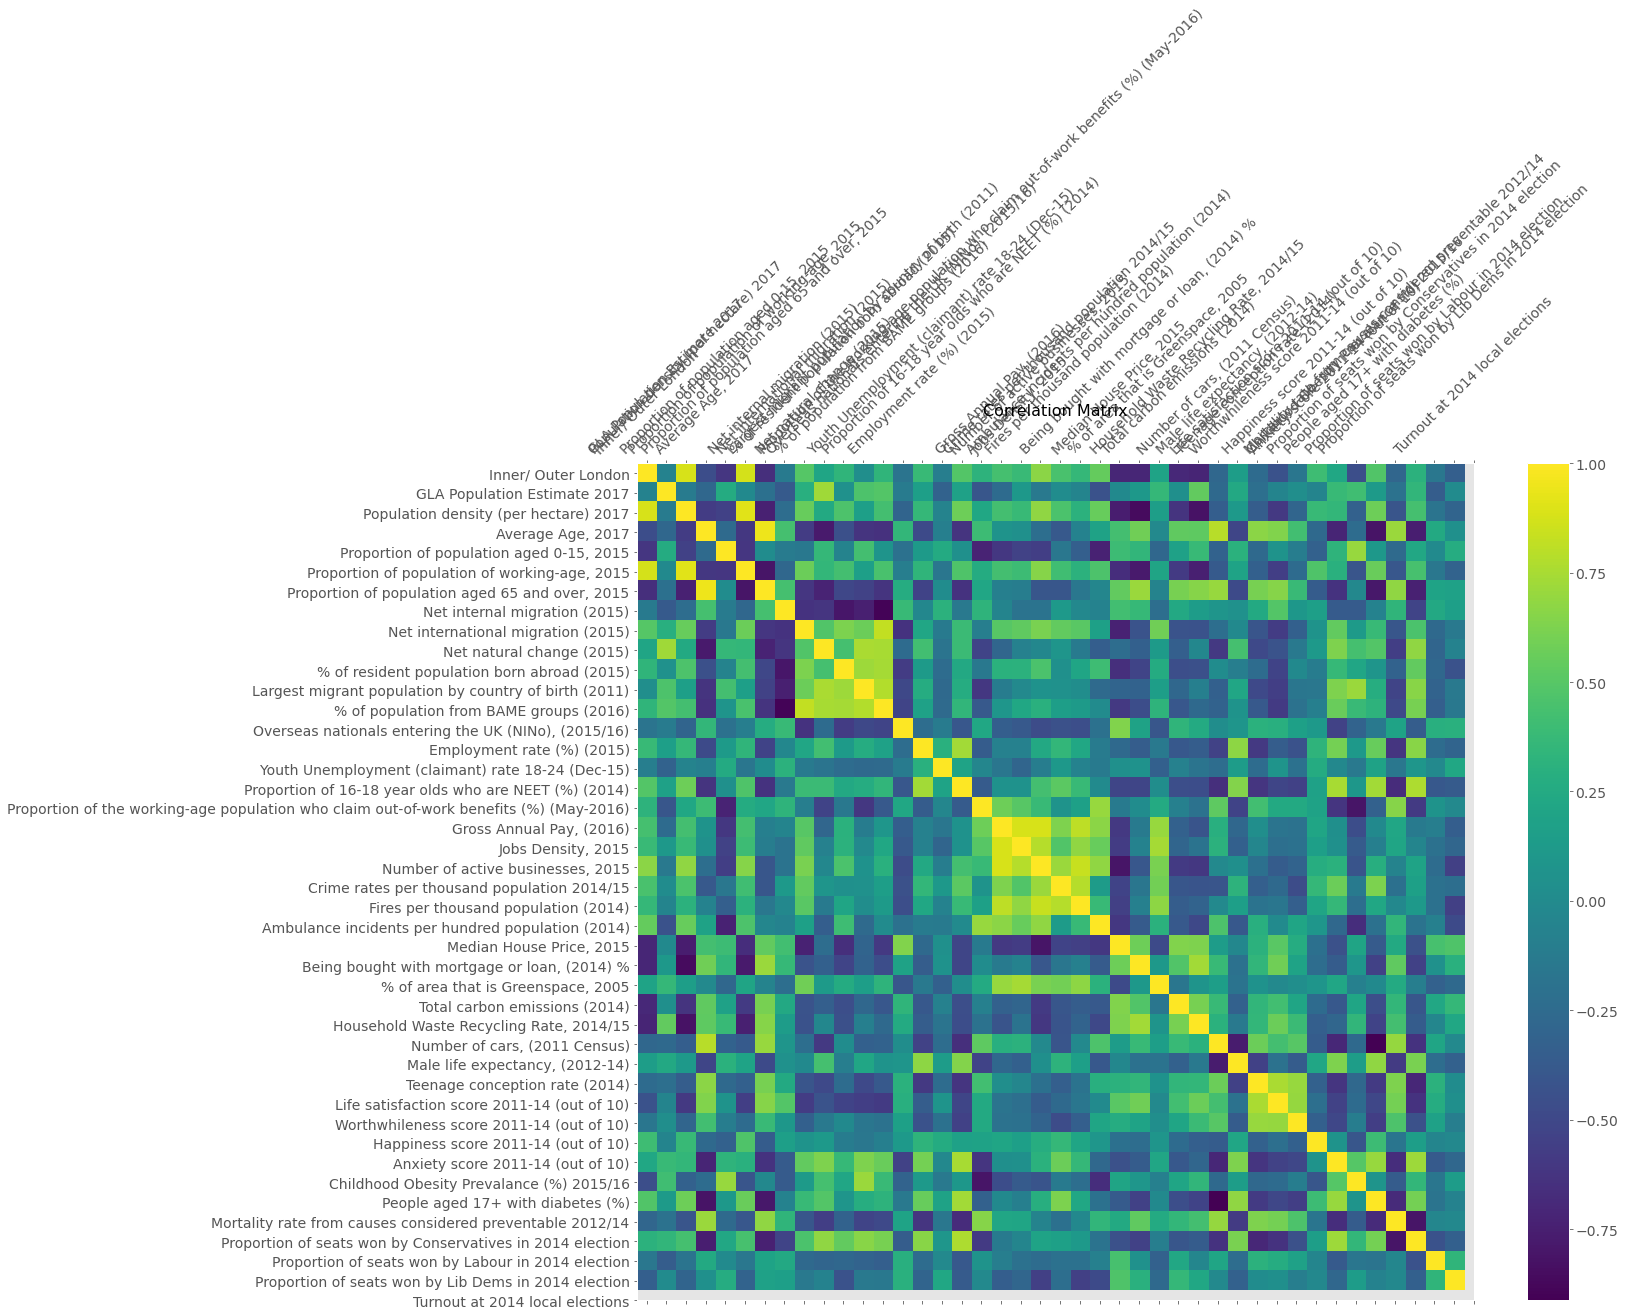

In [24]:
df = borough
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

Correlation within groups

In [25]:
groups=[]
groups=[borough_demography_population,borough_demography_age,borough_diversity,borough_economy,borough_safety,borough_housing,borough_pollution,borough_health,borough_politics]

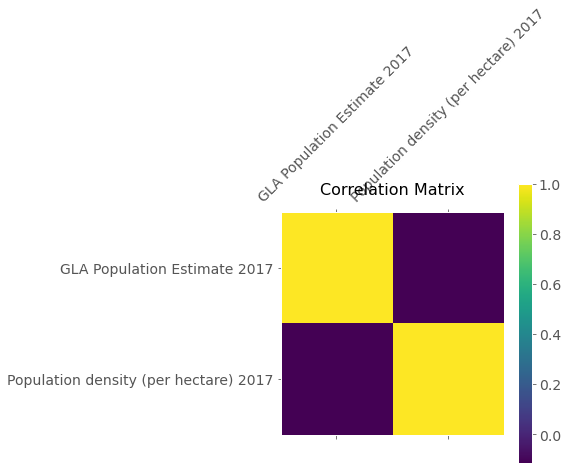

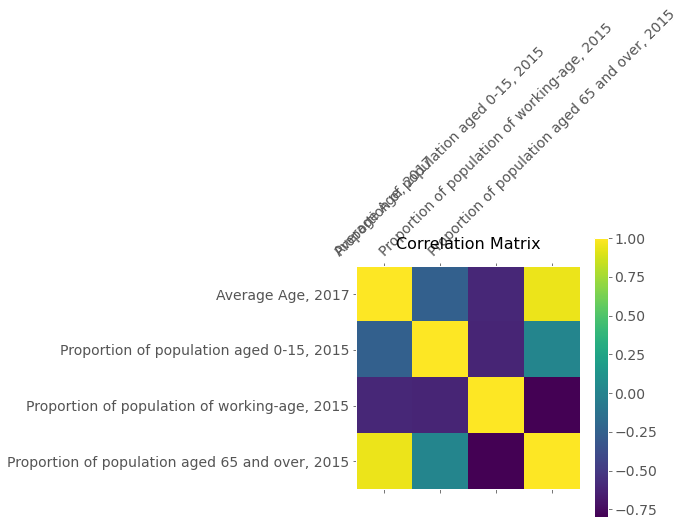

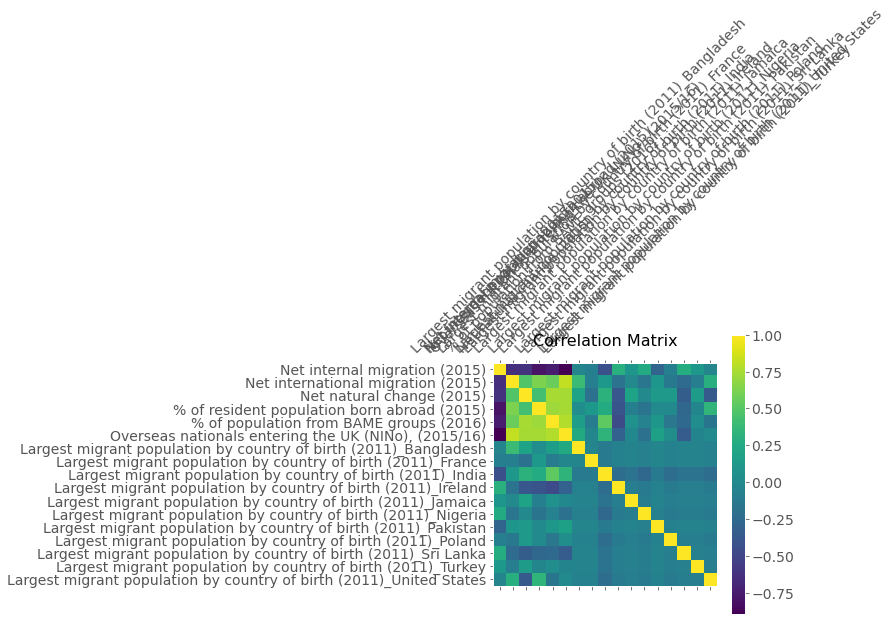

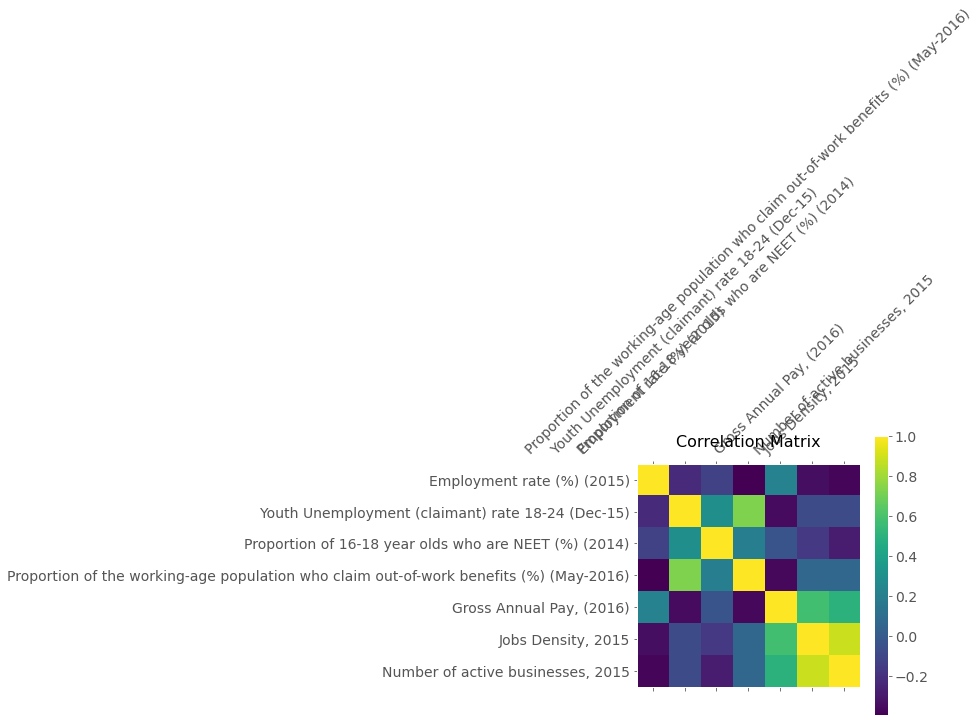

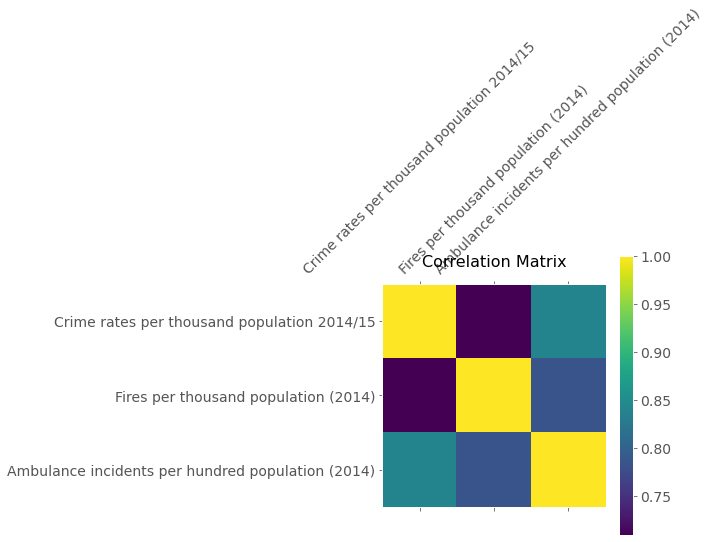

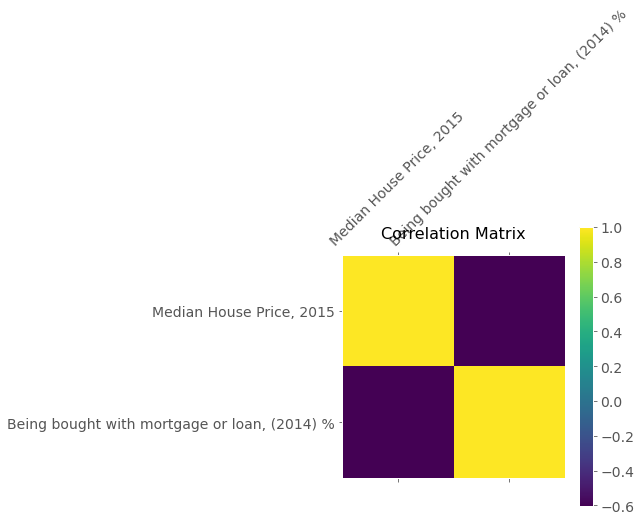

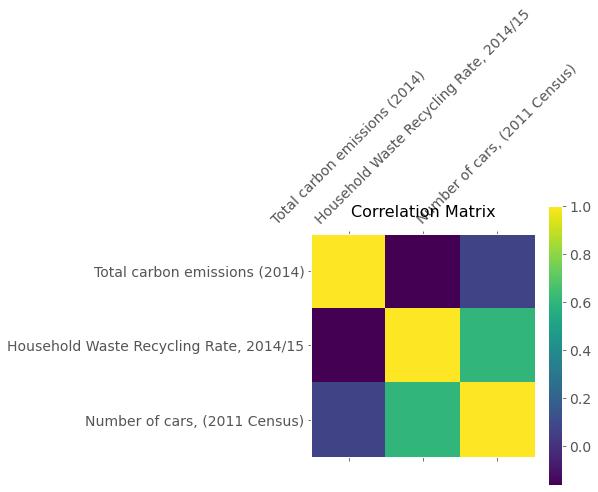

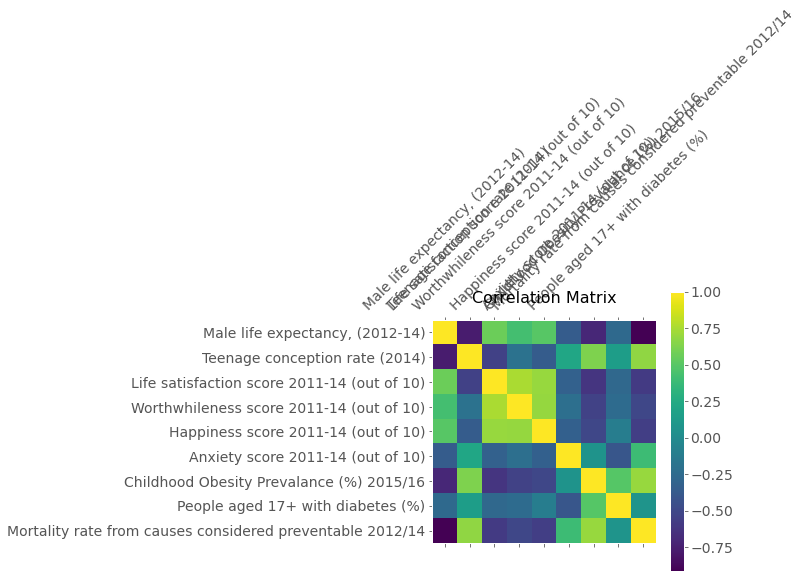

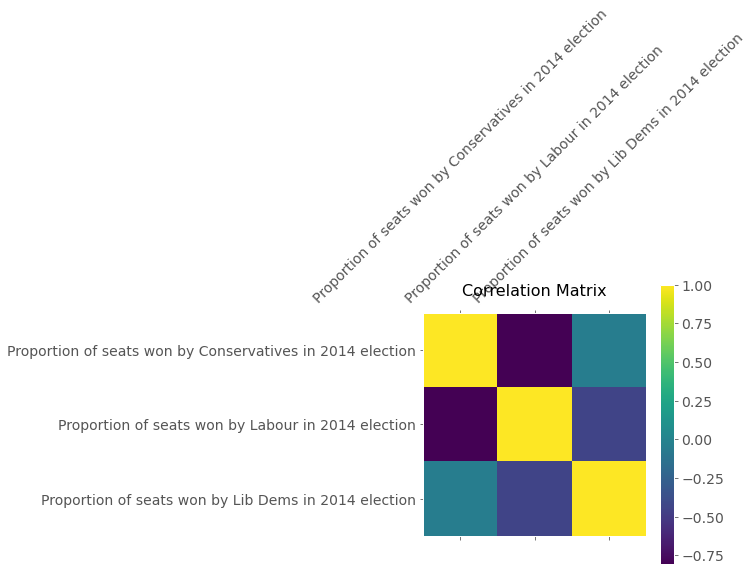

In [26]:
for i in groups:
    df = i
    plt.rcParams["axes.grid"] = False
    f = plt.figure(figsize=(5, 5))
    plt.matshow(df.corr(), fignum=f.number)
    plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
    plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title('Correlation Matrix', fontsize=16)

VIF

In [27]:
# calculating VIF
# This function is partially from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

VIF for each group, followed by Simple Logistic Regression

In [28]:
groups=[borough_demography_population,borough_demography_age,borough_diversity,borough_economy,borough_safety,borough_housing,borough_pollution,borough_health,borough_politics]
for i in groups:
    print(i.columns)
    i = drop_column_using_vif_(i)
    print("The columns remaining after VIF selection are:")
    print(i.columns)
    try: 
        print('Start of Logistic Regression')
        X = i
        y = y
        logit_model=sm.Logit(y,X)
        result=logit_model.fit()
        print(result.summary2())
        params = np.exp(result.params)
        conf = np.exp(result.conf_int())
        conf['OR'] = params
        pvalue=round(result.pvalues,3)
        conf['pvalue']=pvalue
        conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
        print ((conf))
        print('end for this group\n')
        print('\n')
    except Exception:
        print('end for this group\n there was an error!')
        print('\n')
        pass
    


Index(['GLA Population Estimate 2017', 'Population density (per hectare) 2017'], dtype='object')
The columns remaining after VIF selection are:
Index(['GLA Population Estimate 2017', 'Population density (per hectare) 2017'], dtype='object')
Start of Logistic Regression
Optimization terminated successfully.
         Current function value: 0.051561
         Iterations 15
                                   Results: Logit
Model:                    Logit                    Pseudo R-squared:      0.924     
Dependent Variable:       Inner/ Outer London      AIC:                   7.2999    
Date:                     2021-02-16 09:59         BIC:                   10.2314   
No. Observations:         32                       Log-Likelihood:        -1.6499   
Df Model:                 1                        LL-Null:               -21.615   
Df Residuals:             30                       LLR p-value:           2.6325e-10
Converged:                1.0000                   Scale:          

/Users/dhryaya.kamdar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/dhryaya.kamdar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/dhryaya.kamdar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/dhryaya.kamdar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: inf
         Iterations: 35
end for this group
 there was an error!


Index(['Employment rate (%) (2015)',
       'Youth Unemployment (claimant) rate 18-24 (Dec-15)',
       'Proportion of 16-18 year olds who are NEET (%) (2014)',
       'Proportion of the working-age population who claim out-of-work benefits (%) (May-2016)',
       'Gross Annual Pay, (2016)', 'Jobs Density, 2015',
       'Number of active businesses, 2015'],
      dtype='object')
Dropping: Jobs Density, 2015
The columns remaining after VIF selection are:
Index(['Employment rate (%) (2015)',
       'Youth Unemployment (claimant) rate 18-24 (Dec-15)',
       'Proportion of 16-18 year olds who are NEET (%) (2014)',
       'Proportion of the working-age population who claim out-of-work benefits (%) (May-2016)',
       'Gross Annual Pay, (2016)', 'Number of active businesses, 2015'],
      dtype='object')
Start of Logistic Regression
Optimization terminated successfully.
         Current fu

Optimization terminated successfully.
         Current function value: 0.629371
         Iterations 5
                                             Results: Logit
Model:                            Logit                           Pseudo R-squared:             0.068   
Dependent Variable:               Inner/ Outer London             AIC:                          44.2797 
Date:                             2021-02-16 09:59                BIC:                          47.2112 
No. Observations:                 32                              Log-Likelihood:               -20.140 
Df Model:                         1                               LL-Null:                      -21.615 
Df Residuals:                     30                              LLR p-value:                  0.085877
Converged:                        1.0000                          Scale:                        1.0000  
No. Iterations:                   5.0000                                                               

/Users/dhryaya.kamdar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/dhryaya.kamdar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Health and Diversity had errors saying the iteration was not successful. Therefore, they need to be looked at separately because it might be possible that one amongst them would have almost 99% of one category. Hence making it difficult to converge. I resolved it by removing that variable from my dataset.

In [29]:
print('Diversity')
X = borough_diversity[borough_diversity.columns[0:6]]
y = y
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())
print('end for this group\n')
print('\n')
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

Diversity
Optimization terminated successfully.
         Current function value: 0.365345
         Iterations 7
                                           Results: Logit
Model:                         Logit                          Pseudo R-squared:            0.459    
Dependent Variable:            Inner/ Outer London            AIC:                         35.3821  
Date:                          2021-02-16 09:59               BIC:                         44.1765  
No. Observations:              32                             Log-Likelihood:              -11.691  
Df Model:                      5                              LL-Null:                     -21.615  
Df Residuals:                  26                             LLR p-value:                 0.0013347
Converged:                     1.0000                         Scale:                       1.0000   
No. Iterations:                7.0000                                                               
----------------------

In [30]:
print('Health_Scores')
X = borough_health[borough_health.columns[2:6]]
y = y
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())
print('end for this group\n')
print('\n')
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

Health_Scores
Optimization terminated successfully.
         Current function value: 0.440126
         Iterations 7
                                       Results: Logit
Model:                        Logit                       Pseudo R-squared:         0.348    
Dependent Variable:           Inner/ Outer London         AIC:                      36.1680  
Date:                         2021-02-16 09:59            BIC:                      42.0310  
No. Observations:             32                          Log-Likelihood:           -14.084  
Df Model:                     3                           LL-Null:                  -21.615  
Df Residuals:                 28                          LLR p-value:              0.0017647
Converged:                    1.0000                      Scale:                    1.0000   
No. Iterations:               7.0000                                                         
------------------------------------------------------------------------------

In [31]:
print('Health_Scores')
borough_health_exp=borough_health.drop(['Life satisfaction score 2011-14 (out of 10)','Worthwhileness score 2011-14 (out of 10)','Happiness score 2011-14 (out of 10)','Anxiety score 2011-14 (out of 10)'],axis=1)
X = borough_health_exp[borough_health_exp.columns[0:6]]
y = y
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())
print('end for this group\n')
print('\n')
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

Health_Scores
Optimization terminated successfully.
         Current function value: 0.277346
         Iterations 8
                                             Results: Logit
Model:                           Logit                           Pseudo R-squared:             0.589     
Dependent Variable:              Inner/ Outer London             AIC:                          27.7501   
Date:                            2021-02-16 09:59                BIC:                          35.0788   
No. Observations:                32                              Log-Likelihood:               -8.8751   
Df Model:                        4                               LL-Null:                      -21.615   
Df Residuals:                    27                              LLR p-value:                  4.0286e-05
Converged:                       1.0000                          Scale:                        1.0000    
No. Iterations:                  8.0000                                           

In [32]:
print('politics')
X = borough_politics[borough_politics.columns[0:2]]
y = y
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())
print('end for this group\n')
print('\n')
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

politics
Optimization terminated successfully.
         Current function value: 0.628442
         Iterations 5
                                             Results: Logit
Model:                            Logit                           Pseudo R-squared:             0.070   
Dependent Variable:               Inner/ Outer London             AIC:                          44.2203 
Date:                             2021-02-16 09:59                BIC:                          47.1518 
No. Observations:                 32                              Log-Likelihood:               -20.110 
Df Model:                         1                               LL-Null:                      -21.615 
Df Residuals:                     30                              LLR p-value:                  0.082781
Converged:                        1.0000                          Scale:                        1.0000  
No. Iterations:                   5.0000                                                      

In [33]:
print('green')
X = borough_greenspace
y = y
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())
print('end for this group\n')
print('\n')
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

green
Optimization terminated successfully.
         Current function value: 0.603744
         Iterations 5
                                  Results: Logit
Model:                     Logit                    Pseudo R-squared:      0.106  
Dependent Variable:        Inner/ Outer London      AIC:                   40.6396
Date:                      2021-02-16 09:59         BIC:                   42.1053
No. Observations:          32                       Log-Likelihood:        -19.320
Df Model:                  0                        LL-Null:               -21.615
Df Residuals:              31                       LLR p-value:           nan    
Converged:                 1.0000                   Scale:                 1.0000 
No. Iterations:            5.0000                                                 
----------------------------------------------------------------------------------
                                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------

T-Test for green space

In [34]:
from scipy import stats
test=stats.ttest_ind(borough_greenspace, y)

In [35]:
print('stats is',test[0],'and pvalue is',test[1])

stats is [15.08825736] and pvalue is [1.99651313e-22]
